In [1]:
from sisyphus2.backend.models.basic import Basic, Basic_sigmoid, Basic_scan
from sisyphus2.backend.models.lstm import LSTM
from sisyphus2.tasks import task
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rdm = task.rdm2(stim_noise = 0.02, coherences = np.linspace(.5, .55, 100), rec_noise = .01, N_rec = 50)
gen = rdm.generate_train_trials()
params = rdm.__dict__

In [3]:
params['loss_function'] = 'mean_squared_error'

In [4]:
params['load_weights_path'] = '../weights/test_50_rec.npz'

In [20]:
params['load_weights_path'] = '../weights/test_LSTM_50.npz'

In [16]:
train_params ={'save_weights_path': '../weights/test_50_rec.npz'}

In [12]:
tf.reset_default_graph()
model = Basic(params)

In [13]:
model.build()

In [14]:
model.train(gen, {'training_iters': 10000})

Iter 640, Minibatch Loss= 0.003459
Iter 1280, Minibatch Loss= 0.002751
Iter 1920, Minibatch Loss= 0.001334
Iter 2560, Minibatch Loss= 0.001294
Iter 3200, Minibatch Loss= 0.001314
Iter 3840, Minibatch Loss= 0.001513
Iter 4480, Minibatch Loss= 0.001362
Iter 5120, Minibatch Loss= 0.001790
Iter 5760, Minibatch Loss= 0.001390
Iter 6400, Minibatch Loss= 0.001344
Iter 7040, Minibatch Loss= 0.001130
Iter 7680, Minibatch Loss= 0.001175
Iter 8320, Minibatch Loss= 0.001094
Iter 8960, Minibatch Loss= 0.001130
Iter 9600, Minibatch Loss= 0.001077
Optimization finished!


(28.518043994903564, 62.86363697052002)

In [11]:
model.destruct()

In [4]:
tf.reset_default_graph()
model = LSTM(params)

In [5]:
model.build()

In [6]:
model.train(gen, {})

Iter 640, Minibatch Loss= 0.265057
Iter 1280, Minibatch Loss= 0.150976
Iter 1920, Minibatch Loss= 0.182154
Iter 2560, Minibatch Loss= 0.148721
Iter 3200, Minibatch Loss= 0.131151
Iter 3840, Minibatch Loss= 0.207835
Iter 4480, Minibatch Loss= 0.142024
Iter 5120, Minibatch Loss= 0.104030
Iter 5760, Minibatch Loss= 0.133304
Iter 6400, Minibatch Loss= 0.154815
Iter 7040, Minibatch Loss= 0.118517
Iter 7680, Minibatch Loss= 0.106180
Iter 8320, Minibatch Loss= 0.177641
Iter 8960, Minibatch Loss= 0.116821
Iter 9600, Minibatch Loss= 0.144134
Iter 10240, Minibatch Loss= 0.120444
Iter 10880, Minibatch Loss= 0.145426
Iter 11520, Minibatch Loss= 0.154830
Iter 12160, Minibatch Loss= 0.186992
Iter 12800, Minibatch Loss= 0.155770
Iter 13440, Minibatch Loss= 0.187700
Iter 14080, Minibatch Loss= 0.152824
Iter 14720, Minibatch Loss= 0.182648
Iter 15360, Minibatch Loss= 0.167909
Iter 16000, Minibatch Loss= 0.159927
Iter 16640, Minibatch Loss= 0.168285
Iter 17280, Minibatch Loss= 0.188991
Iter 17920, Minib

(170.7626190185547, 70.67482399940491)

In [7]:
model.save('../weights/test_LSTM_50.npz')

In [10]:
tf.reset_default_graph()
model = Basic_sigmoid(params)

In [11]:
model.build()

In [12]:
model.train(gen, {})

Iter 640, Minibatch Loss= 0.195098
Iter 1280, Minibatch Loss= 0.155132
Iter 1920, Minibatch Loss= 0.115115
Iter 2560, Minibatch Loss= 0.183497
Iter 3200, Minibatch Loss= 0.128513
Iter 3840, Minibatch Loss= 0.124257
Iter 4480, Minibatch Loss= 0.179334
Iter 5120, Minibatch Loss= 0.133492
Iter 5760, Minibatch Loss= 0.125150
Iter 6400, Minibatch Loss= 0.152611
Iter 7040, Minibatch Loss= 0.166292
Iter 7680, Minibatch Loss= 0.139638
Iter 8320, Minibatch Loss= 0.124516
Iter 8960, Minibatch Loss= 0.159407
Iter 9600, Minibatch Loss= 0.111304
Iter 10240, Minibatch Loss= 0.176113
Iter 10880, Minibatch Loss= 0.181504
Iter 11520, Minibatch Loss= 0.136199
Iter 12160, Minibatch Loss= 0.146469
Iter 12800, Minibatch Loss= 0.128809
Iter 13440, Minibatch Loss= 0.147789
Iter 14080, Minibatch Loss= 0.160914
Iter 14720, Minibatch Loss= 0.135058
Iter 15360, Minibatch Loss= 0.172715
Iter 16000, Minibatch Loss= 0.137437
Iter 16640, Minibatch Loss= 0.148012
Iter 17280, Minibatch Loss= 0.172166
Iter 17920, Minib

(124.28856682777405, 72.06825804710388)

In [13]:
tf.reset_default_graph()
model = Basic_scan(params)

In [14]:
model.build()

In [15]:
model.train(gen, {})

Iter 640, Minibatch Loss= 0.272054
Iter 1280, Minibatch Loss= 0.170246
Iter 1920, Minibatch Loss= 0.078765
Iter 2560, Minibatch Loss= 0.118882
Iter 3200, Minibatch Loss= 0.093433
Iter 3840, Minibatch Loss= 0.100554
Iter 4480, Minibatch Loss= 0.096155
Iter 5120, Minibatch Loss= 0.057453
Iter 5760, Minibatch Loss= 0.037765
Iter 6400, Minibatch Loss= 0.009540
Iter 7040, Minibatch Loss= 0.009572
Iter 7680, Minibatch Loss= 0.006069
Iter 8320, Minibatch Loss= 0.006144
Iter 8960, Minibatch Loss= 0.005117
Iter 9600, Minibatch Loss= 0.005521
Iter 10240, Minibatch Loss= 0.004703
Iter 10880, Minibatch Loss= 0.004308
Iter 11520, Minibatch Loss= 0.004290
Iter 12160, Minibatch Loss= 0.004176
Iter 12800, Minibatch Loss= 0.003783
Iter 13440, Minibatch Loss= 0.003086
Iter 14080, Minibatch Loss= 0.002945
Iter 14720, Minibatch Loss= 0.002676
Iter 15360, Minibatch Loss= 0.003262
Iter 16000, Minibatch Loss= 0.002912
Iter 16640, Minibatch Loss= 0.003097
Iter 17280, Minibatch Loss= 0.002752
Iter 17920, Minib

(138.7799699306488, 14.857112884521484)

In [19]:
model.destruct()

In [21]:
model = Basic(params)
model.build()

In [7]:
x = gen.next()[0]

In [11]:
outputs, states = model.test_batch(x)

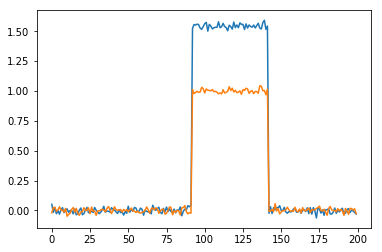

In [12]:
plt.plot(x[1,:,:])

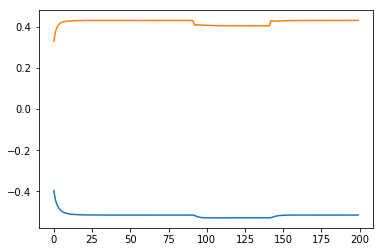

In [13]:
plt.plot(outputs[1,:,:])

In [60]:
outputs[1,2,1]

-0.052840549

In [61]:
x[1,2,1]

1.0008873123869966

In [20]:
weights = np.load('../weights/test_LSTM_50.npz')